In [ ]:
# Imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

# Dataset and Preprocessing

Sources: 
- 2021-22 Season Advanced Stats: https://www.basketball-reference.com//leagues/NBA_2021_advanced.html
- 2021-22 Season Stats: https://www.basketball-reference.com//leagues/NBA_2021_totals.html

In [ ]:
# Import datasets and merge
df1 = pd.read_csv('nba_2021_player.csv', sep=',')
df2 = pd.read_csv('nba_2021_player_adv.csv', sep=',')
df = pd.merge(df1, df2)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
print(df.shape)
df.head(10)

(705, 50)


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Precious Achiuwa\achiupr01,PF,21,MIA,61,4,737,124,228,...,13.5,19.5,0.3,1.0,1.3,0.085,-3.6,-0.5,-4.1,-0.4
1,2,Jaylen Adams\adamsja01,PG,24,MIL,7,0,18,1,8,...,0.0,18.6,-0.1,0.0,-0.1,-0.252,-15.1,-4.6,-19.8,-0.1
2,3,Steven Adams\adamsst01,C,27,NOP,58,58,1605,189,308,...,17.5,11.7,2.3,1.7,4.0,0.119,-0.4,0.1,-0.3,0.7
3,4,Bam Adebayo\adebaba01,C,23,MIA,64,64,2143,456,800,...,15.0,23.7,5.6,3.2,8.8,0.197,2.9,2.0,4.9,3.7
4,5,LaMarcus Aldridge\aldrila01,C,35,TOT,26,23,674,140,296,...,7.9,22.2,0.5,0.6,1.1,0.080,-0.2,-0.2,-0.3,0.3
5,5,LaMarcus Aldridge\aldrila01,C,35,SAS,21,18,544,115,248,...,7.0,22.7,0.3,0.5,0.8,0.067,-0.2,-0.7,-0.9,0.2
6,5,LaMarcus Aldridge\aldrila01,C,35,BRK,5,5,130,25,48,...,11.8,19.9,0.2,0.2,0.4,0.135,0.1,2.1,2.2,0.1
7,6,Ty-Shon Alexander\alexaty01,SG,22,PHO,15,0,47,3,12,...,18.9,15.0,-0.1,0.0,0.0,-0.048,-4.8,-1.7,-6.5,-0.1
8,7,Nickeil Alexander-Walker\alexani01,SG,22,NOP,46,13,1007,192,458,...,12.4,23.2,-0.3,1.0,0.7,0.035,-1.4,0.1,-1.3,0.2
9,8,Grayson Allen\allengr01,SG,25,MEM,50,38,1259,173,414,...,9.6,16.8,1.5,1.2,2.7,0.101,-0.2,0.1,-0.2,0.6


## Column description
- Rk -- Rank
- Pos -- Position
- Age -- Player's age on February 1 of the season
- Tm -- Team
- G -- Games
- GS -- Games Started
- MP -- Minutes Played Per Game
- FG -- Field Goals Per Game
- FGA -- Field Goal Attempts Per Game
- FG% -- Field Goal Percentage
- 3P -- 3-Point Field Goals Per Game
- 3PA -- 3-Point Field Goal Attempts Per Game
- 3P% -- 3-Point Field Goal Percentage
- 2P -- 2-Point Field Goals Per Game
- 2PA -- 2-Point Field Goal Attempts Per Game
- 2P% -- 2-Point Field Goal Percentage
- eFG% -- Effective Field Goal Percentage. This statistic adjusts for the fact that a 3-point field goal is worth one - more point than a 2-point field goal.
- FT -- Free Throws Per Game
- FTA -- Free Throw Attempts Per Game
- FT% -- Free Throw Percentage
- ORB -- Offensive Rebounds Per Game
- DRB -- Defensive Rebounds Per Game
- TRB -- Total Rebounds Per Game
- AST -- Assists Per Game
- STL -- Steals Per Game
- BLK -- Blocks Per Game
- TOV -- Turnovers Per Game
- PF -- Personal Fouls Per Game
- PTS -- Points Per Game
- PER -- Player Efficiency Rating. A measure of per-minute production standardized such that the league average is 15.
- TS% -- True Shooting Percentage. A measure of shooting efficiency that takes into account 2-point field goals, 3-point field goals, and free throws.
- 3PAr -- 3-Point Attempt Rate. Percentage of FG Attempts from 3-Point Range
- FTr -- Free Throw Attempt Rate. Number of FT Attempts Per FG Attempt
- ORB% -- Offensive Rebound Percentage. An estimate of the percentage of available offensive rebounds a player grabbed while they were on the floor.
- DRB% -- Defensive Rebound Percentage. An estimate of the percentage of available defensive rebounds a player grabbed while they were on the floor.
- TRB% -- Total Rebound Percentage. An estimate of the percentage of available rebounds a player grabbed while they were on the floor.
- AST% -- Assist Percentage. An estimate of the percentage of teammate field goals a player assisted while they were on the floor.
- STL% -- Steal Percentage. An estimate of the percentage of opponent possessions that end with a steal by the player while they were on the floor.
- BLK% -- Block Percentage. An estimate of the percentage of opponent two-point field goal attempts blocked by the player while they were on the floor.
- TOV% -- Turnover Percentage. An estimate of turnovers committed per 100 plays.
- USG% -- Usage Percentage. An estimate of the percentage of team plays used by a player while they were on the floor.
- OWS -- Offensive Win Shares. An estimate of the number of wins contributed by a player due to offense.
- DWS -- Defensive Win Shares. An estimate of the number of wins contributed by a player due to defense.
- WS -- Win Shares. An estimate of the number of wins contributed by a player.
- WS/48 -- Win Shares Per 48 Minutes. An estimate of the number of wins contributed by a player per 48 minutes (league average is approximately .100)
- OBPM -- Offensive Box Plus/Minus. A box score estimate of the offensive points per 100 possessions a player contributed above a league-average player, translated to an average team.
- DBPM -- Defensive Box Plus/Minus. A box score estimate of the defensive points per 100 possessions a player contributed above a league-average player, translated to an average team.
- BPM -- Box Plus/Minus. A box score estimate of the points per 100 possessions a player contributed above a league-average player, translated to an average team.
- VORP -- Value over Replacement Player. A box score estimate of the points per 100 TEAM possessions that a player contributed above a replacement-level (-2.0) player, translated to an average team and prorated to an 82-game season.

In [ ]:
# remove data with invalid values
# Reference: https://stackoverflow.com/questions/31323499/sklearn-error-valueerror-input-contains-nan-infinity-or-a-value-too-large-for
print('Shape before cleaning', df.shape)
df.dropna(inplace=True)
good_indices = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
df = df[good_indices]
print('Shape after cleaning', df.shape)

Shape before cleaning (705, 50)
Shape after cleaning (647, 50)


In [ ]:
# take care of duplicates eg. LaMarcus Aldrige changed team from SAS to BRK, we drop these and consider the team with which he played majority of the games
df[df.Tm == 'TOT']

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
4,5,LaMarcus Aldridge\aldrila01,C,35,TOT,26,23,674,140,296,...,7.9,22.2,0.5,0.6,1.1,0.080,-0.2,-0.2,-0.3,0.3
10,9,Jarrett Allen\allenja01,C,22,TOT,63,45,1864,298,482,...,14.1,16.6,4.3,2.1,6.4,0.166,1.3,-0.2,1.1,1.4
13,10,Al-Farouq Aminu\aminual01,PF,30,TOT,23,14,434,38,99,...,20.5,13.6,-0.4,0.5,0.1,0.010,-4.9,1.1,-3.8,-0.2
25,20,D.J. Augustin\augusdj01,PG,33,TOT,57,12,1129,135,343,...,14.5,16.8,1.5,0.5,2.1,0.088,-0.6,-1.5,-2.1,0.0
47,40,Jordan Bell\belljo01,C,26,TOT,6,1,82,7,22,...,14.9,13.6,-0.1,0.1,0.0,-0.008,-5.9,0.1,-5.8,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,506,Moritz Wagner\wagnemo01,C,23,TOT,45,24,722,104,229,...,13.9,18.1,0.5,0.8,1.2,0.082,-2.7,0.2,-2.6,-0.1
666,510,Brad Wanamaker\wanambr01,PG,31,TOT,61,0,1053,115,299,...,17.1,16.9,-0.2,1.0,0.9,0.039,-4.4,0.3,-4.0,-0.5
683,525,Lou Williams\willilo02,PG,34,TOT,66,4,1423,265,646,...,13.0,25.7,0.5,1.2,1.7,0.056,-1.0,-1.5,-2.5,-0.2
689,529,D.J. Wilson\wilsodj01,PF,24,TOT,35,1,433,68,168,...,10.9,19.7,-0.2,0.5,0.3,0.032,-2.7,-0.6,-3.3,-0.1


In [ ]:
# ... continued
df.drop(df.index[df['Tm'] == 'TOT'], inplace = True)
print('Shape after TOT drop', df.shape)
df = df.groupby('Rk', group_keys=False).apply(lambda x: x.loc[x.G.idxmax()])
print('Shape after Duplicates drop', df.shape)
df[df['Rk'] == 5]

Shape after TOT drop (571, 50)
Shape after Duplicates drop (502, 50)


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
Rk,,,,,,,,,,,,,,,,,,,,,
5,5,LaMarcus Aldridge\aldrila01,C,35,SAS,21,18,544,115,248,...,7.0,22.7,0.3,0.5,0.8,0.067,-0.2,-0.7,-0.9,0.2


In [ ]:
# remove player who haven't played significant no. of games - typically 82 games thus considering removing < 20
# this is due to any injuries
df = df[df.G > 25]
print('Shape after player removal < 20 games', df.shape)

Shape after player removal < 20 games (385, 50)


In [ ]:
# remove unnecessary columns
df.drop('Rk', 1, inplace=True)
# remove age, position, team, name as they shouldn't be considered in our clustering process
# save these as needed later
cols = ['Pos', 'Age', 'Tm', 'Player']
df_removed = df[cols]
df.drop(cols, 1, inplace=True)
print('Shape after column removal', df.shape)

Shape after column removal (385, 45)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


# Clustering

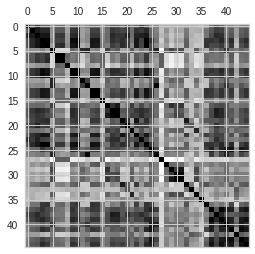

In [ ]:
# Print the covariance matrix
plt.matshow(df.corr())
plt.show()

In [ ]:
# reduce dimensions that captures 99% of the variance
print('Shape before PCA', df.shape)
pca = PCA(n_components = 0.99)
pca.fit(df)
r_df = pca.transform(df)
print('Shape after PCA', r_df.shape)

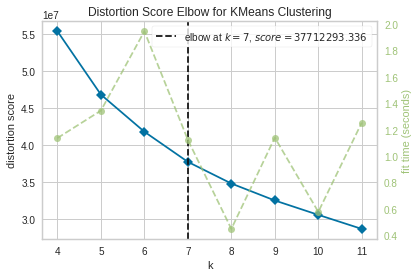

In [ ]:
# K Means with elbow method
# Reference: https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))
visualizer.fit(r_df)
visualizer.show()

In [ ]:
# Perform KMeans using the cluster from the elbow method and add it to the class
clusters = 7
kmeans = KMeans(n_clusters=clusters, random_state=0)
kmeans.fit(r_df)
print(df.shape)
print(df_removed.shape)
frames = [df, df_removed]
df = pd.concat(frames, axis=1)
df['Cluster'] = kmeans.labels_

(385, 45)
(385, 4)


In [ ]:
df[df['Cluster'] == 0].head(30)

,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,WS/48,OBPM,DBPM,BPM,VORP,Pos,Age,Tm,Player,Cluster
Rk,,,,,,,,,,,,,,,,,,,,,
11,69,69,1887,308,658,0.468,94,261,0.360,214,...,0.143,1.4,1.9,3.3,2.5,PF,27,MEM,Kyle Anderson\anderky01,0
15,69,3,1690,327,777,0.421,133,325,0.409,194,...,0.073,0.2,-1.3,-1.1,0.4,PF,36,POR,Carmelo Anthony\anthoca01,0
24,72,50,1853,292,726,0.402,59,207,0.285,233,...,0.013,-3.7,-1.4,-5.1,-1.5,SG,25,ORL,Dwayne Bacon\bacondw01,0
27,55,55,1747,290,700,0.414,172,455,0.378,118,...,0.089,1.4,0.3,1.7,1.6,PG,23,NOP,Lonzo Ball\balllo01,0
30,58,58,2102,319,642,0.497,100,256,0.391,219,...,0.103,1.5,-1.3,0.2,1.1,PF,28,SAC,Harrison Barnes\barneha02,0
32,56,52,1736,259,608,0.426,98,257,0.381,161,...,0.061,-1.0,-0.8,-1.9,0.1,SF,30,DEN,Will Barton\bartowi01,0
34,67,38,1835,191,412,0.464,110,272,0.404,81,...,0.132,0.6,1.5,2.1,1.9,SF,32,LAC,Nicolas Batum\batumni01,0
37,55,55,1714,273,690,0.396,83,286,0.290,190,...,-0.026,-3.1,-1.3,-4.4,-1.0,PF,20,OKC,Darius Bazley\bazleda01,0
44,70,53,1909,279,691,0.404,175,460,0.380,104,...,0.082,0.3,-0.8,-0.5,0.7,SF,21,DET,Saddiq Bey\beysa01,0


In [ ]:
df[df['Cluster'] == 1]

,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,WS/48,OBPM,DBPM,BPM,VORP,Pos,Age,Tm,Player,Cluster
Rk,,,,,,,,,,,,,,,,,,,,,
1,61,4,737,124,228,0.544,0,1,0.000,124,...,0.085,-3.6,-0.5,-4.1,-0.4,PF,21,MIA,Precious Achiuwa\achiupr01,1
19,30,27,841,99,241,0.411,50,143,0.350,49,...,0.091,-1.2,0.1,-1.1,0.2,SF,35,MIA,Trevor Ariza\arizatr01,1
20,37,6,713,71,192,0.370,49,129,0.380,22,...,0.080,-1.3,-0.9,-2.2,0.0,PG,33,MIL,D.J. Augustin\augusdj01,1
28,46,5,725,142,301,0.472,38,118,0.322,104,...,0.117,0.2,0.0,0.1,0.4,C,22,ORL,Mo Bamba\bambamo01,1
41,51,12,972,117,228,0.513,14,53,0.264,103,...,0.059,-3.2,1.4,-1.9,0.0,SF,26,TOR,DeAndre' Bembry\bembrde01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,50,7,655,88,233,0.378,46,149,0.309,42,...,0.011,-4.5,-0.9,-5.4,-0.6,PG,24,MIA,Gabe Vincent\vincega01,1
510,39,0,625,61,173,0.353,13,61,0.213,48,...,0.036,-4.4,0.9,-3.5,-0.2,PG,31,GSW,Brad Wanamaker\wanambr01,1
513,50,4,723,79,180,0.439,36,90,0.400,43,...,0.102,-1.1,0.5,-0.7,0.2,SF,26,TOR,Yuta Watanabe\watanyu01,1


In [ ]:
df[df['Cluster'] == 2].head(30)

,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,WS/48,OBPM,DBPM,BPM,VORP,Pos,Age,Tm,Player,Cluster
Rk,,,,,,,,,,,,,,,,,,,,,
3,58,58,1605,189,308,0.614,0,3,0.000,189,...,0.119,-0.4,0.1,-0.3,0.7,C,27,NOP,Steven Adams\adamsst01,2
9,51,40,1544,254,417,0.609,6,19,0.316,248,...,0.155,1.2,-0.4,0.8,1.1,C,22,CLE,Jarrett Allen\allenja01,2
16,47,34,1273,219,552,0.397,58,172,0.337,161,...,-0.001,-1.9,-1.4,-3.3,-0.4,PG,20,ORL,Cole Anthony\anthoco01,2
17,43,43,1433,249,519,0.480,104,261,0.398,145,...,0.104,0.8,0.4,1.2,1.2,SF,23,TOR,OG Anunoby\anunoog01,2
25,43,42,1112,247,490,0.504,37,108,0.343,210,...,0.059,-0.4,-2.7,-3.1,-0.3,PF,21,SAC,Marvin Bagley III\baglema01,2
26,51,31,1469,293,672,0.436,92,261,0.352,201,...,0.093,1.1,0.7,1.8,1.4,PG,19,CHO,LaMelo Ball\ballla01,2
29,68,17,1519,234,499,0.469,117,271,0.432,117,...,0.093,-0.6,-0.2,-0.8,0.5,SG,22,MEM,Desmond Bane\banede01,2
39,37,36,1214,264,600,0.440,128,321,0.399,136,...,0.053,1.6,-1.8,-0.2,0.6,SG,24,MIN,Malik Beasley\beaslma01,2
42,57,7,1464,193,478,0.404,169,428,0.395,24,...,0.101,0.3,-1.1,-0.8,0.4,PF,28,WAS,Dāvis Bertāns\bertada01,2


In [ ]:
df[df['Cluster'] == 3]

,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,WS/48,OBPM,DBPM,BPM,VORP,Pos,Age,Tm,Player,Cluster
Rk,,,,,,,,,,,,,,,,,,,,,
14,57,3,551,67,137,0.489,7,29,0.241,60,...,0.057,-3.7,0.2,-3.5,-0.2,SF,28,MIL,Thanasis Antetokounmpo\antetth01,3
18,44,0,450,49,117,0.419,25,67,0.373,24,...,0.093,-2.6,0.3,-2.3,0.0,PG,26,CHI,Ryan Arcidiacono\arcidry01,3
33,30,0,245,30,67,0.448,5,17,0.294,25,...,0.068,-2.3,0.4,-1.9,0.0,SF,25,SAS,Keita Bates-Diop\bateske01,3
49,26,1,439,69,150,0.460,17,58,0.293,52,...,0.052,-1.3,-1.3,-2.6,-0.1,PF,32,SAC,Nemanja Bjelica\bjeline01,3
54,32,2,160,25,58,0.431,9,24,0.375,16,...,-0.004,-3.8,-0.3,-4.1,-0.1,PF,21,DEN,Bol Bol\bolbo01,3
57,40,8,432,30,81,0.370,13,47,0.277,17,...,-0.001,-5.8,0.0,-5.8,-0.4,SF,21,WAS,Isaac Bonga\bongais01,3
63,28,0,138,25,52,0.481,12,28,0.429,13,...,0.172,0.6,1.6,2.2,0.1,PF,24,UTA,Jarrell Brantley\brantja01,3
89,41,1,281,33,72,0.458,9,33,0.273,24,...,0.053,-2.6,0.0,-2.6,0.0,PF,23,DEN,Vlatko Čančar\cancavl01,3
104,44,1,394,45,103,0.437,23,56,0.411,22,...,0.085,-1.9,-0.1,-2.0,0.0,SG,23,LAC,Amir Coffey\coffeam01,3


In [ ]:
df[df['Cluster'] == 4]

,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,WS/48,OBPM,DBPM,BPM,VORP,Pos,Age,Tm,Player,Cluster
Rk,,,,,,,,,,,,,,,,,,,,,
4,64,64,2143,456,800,0.570,2,8,0.250,454,...,0.197,2.9,2.0,4.9,3.7,C,23,MIA,Bam Adebayo\adebaba01,4
22,69,69,2115,430,687,0.626,4,20,0.200,426,...,0.191,1.1,0.1,1.2,1.7,C,22,PHO,Deandre Ayton\aytonde01,4
53,72,72,2216,406,925,0.439,180,461,0.390,226,...,0.113,0.2,-0.7,-0.4,0.9,SF,31,UTA,Bojan Bogdanović\bogdabo02,4
69,56,56,1930,444,980,0.453,145,374,0.388,299,...,0.105,3.0,-0.9,2.1,2.0,PG,28,IND,Malcolm Brogdon\brogdma01,4
71,67,67,1997,432,1031,0.419,128,372,0.344,304,...,0.033,-2.6,-1.1,-3.7,-0.9,SF,25,MEM,Dillon Brooks\brookdi01,4
74,58,58,1999,538,1111,0.484,163,411,0.397,375,...,0.115,3.2,-0.7,2.5,2.3,SG,24,BOS,Jaylen Brown\brownja02,4
84,52,52,1745,366,736,0.497,25,102,0.245,341,...,0.255,5.4,2.3,7.7,4.3,SF,31,MIA,Jimmy Butler\butleji01,4
102,68,1,1818,457,1075,0.425,208,599,0.347,249,...,0.111,1.8,-0.4,1.4,1.6,SG,28,UTA,Jordan Clarkson\clarkjo01,4
105,63,63,1848,429,771,0.556,83,208,0.399,346,...,0.174,2.5,-0.2,2.3,2.0,PF,23,ATL,John Collins\collijo01,4


In [ ]:
df[df['Cluster'] == 5]

,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,WS/48,OBPM,DBPM,BPM,VORP,Pos,Age,Tm,Player,Cluster
Rk,,,,,,,,,,,,,,,,,,,,,
12,61,61,2013,626,1100,0.569,67,221,0.303,559,...,0.244,6.2,2.8,9.0,5.6,PF,26,MIL,Giannis Antetokounmpo\antetgi01,5
31,72,72,2511,467,1060,0.441,124,309,0.401,343,...,0.078,-0.9,-0.3,-1.2,0.5,SG,20,NYK,RJ Barrett\barrerj01,5
38,60,60,2147,670,1382,0.485,130,373,0.349,540,...,0.132,4.8,-1.4,3.4,2.9,SG,27,WAS,Bradley Beal\bealbr01,5
58,67,67,2270,623,1287,0.484,126,371,0.340,497,...,0.104,1.7,-1.4,0.3,1.3,SG,24,PHO,Devin Booker\bookede01,5
116,63,63,2152,658,1365,0.482,337,801,0.421,321,...,0.201,8.3,0.4,8.7,5.8,PG,32,GSW,Stephen Curry\curryst01,5
130,66,66,2262,647,1351,0.479,192,548,0.350,455,...,0.163,6.1,0.7,6.8,5.1,PG,21,DAL,Luka Dončić\doncilu01,5
141,72,55,2314,505,1211,0.417,171,520,0.329,334,...,0.017,-0.4,-1.7,-2.1,-0.1,SG,19,MIN,Anthony Edwards\edwaran01,5
162,58,58,2036,529,1110,0.477,103,320,0.322,426,...,0.098,3.1,-1.3,1.8,2.0,PG,23,SAC,De'Aaron Fox\foxde01,5
243,61,61,2093,513,1101,0.466,143,375,0.381,370,...,0.120,3.3,-1.1,2.2,2.2,SF,23,NOP,Brandon Ingram\ingrabr01,5


In [ ]:
df[df['Cluster'] == 6]

,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,WS/48,OBPM,DBPM,BPM,VORP,Pos,Age,Tm,Player,Cluster
Rk,,,,,,,,,,,,,,,,,,,,,
7,46,13,1007,192,458,0.419,76,219,0.347,116,...,0.035,-1.4,0.1,-1.3,0.2,SG,22,NOP,Nickeil Alexander-Walker\alexani01,6
8,50,38,1259,173,414,0.418,107,274,0.391,66,...,0.101,-0.2,0.1,-0.2,0.6,SG,25,MEM,Grayson Allen\allengr01,6
21,54,32,1257,130,312,0.417,53,168,0.315,77,...,0.046,-3.6,0.4,-3.1,-0.4,SF,20,WAS,Deni Avdija\avdijde01,6
35,53,31,980,134,304,0.441,27,103,0.262,107,...,0.049,-3.4,-1.1,-4.5,-0.6,C,34,TOR,Aron Baynes\baynear01,6
36,67,18,1333,176,392,0.449,75,184,0.408,101,...,0.065,-2.9,1.7,-1.2,0.2,SF,31,GSW,Kent Bazemore\bazemke01,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,63,9,1138,108,247,0.437,48,129,0.372,60,...,0.046,-4.0,0.3,-3.7,-0.5,PF,22,BOS,Grant Williams\willigr01,6
525,42,3,918,181,430,0.421,45,119,0.378,136,...,0.084,-0.5,-1.0,-1.5,0.1,PG,34,LAC,Lou Williams\willilo02,6
527,52,13,985,186,258,0.721,0,2,0.000,186,...,0.258,2.9,3.1,6.0,2.0,C,23,BOS,Robert Williams\williro04,6


In [ ]:
df[df['Player'].str.contains('Curry')]

,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,WS/48,OBPM,DBPM,BPM,VORP,Pos,Age,Tm,Player,Cluster
Rk,,,,,,,,,,,,,,,,,,,,,
115,57,57,1638,258,552,0.467,126,280,0.450,132,...,0.118,0.1,-0.4,-0.3,0.7,SG,30,PHI,Seth Curry\curryse01,2
116,63,63,2152,658,1365,0.482,337,801,0.421,321,...,0.201,8.3,0.4,8.7,5.8,PG,32,GSW,Stephen Curry\curryst01,5
